<a href="https://colab.research.google.com/github/ShashankMysolla/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**



This dataset is a detailed collection of information on tobacco use from 2011 to the present.
It includes over 43,000 entries, each representing different aspects of tobacco usage across various locations and demographics.
Key columns in the dataset like 'YEAR', 'LocationDesc', and 'MeasureDesc' help categorize the data by time, place, and specific tobacco-related behavior.
The dataset primarily sources its data from the Behavioral Risk Factor Surveillance System (BRFSS), ensuring reliability.
It covers a range of topics, such as cigarette and smokeless tobacco use, specifically among adults.
By including different response types and data values, the dataset provides a nuanced view of tobacco consumption patterns.
The data is broken down by demographics like gender, race, age, and education level, offering insights into how these factors correlate with tobacco use.
This comprehensive dataset serves as a vital tool for understanding and analyzing tobacco use trends over the years.
It's particularly useful for researchers, public health officials, and policymakers aiming to develop informed strategies to address tobacco use.
Overall, the dataset is a rich resource for anyone looking to study the behavioral risk factors associated with tobacco consumption.

**Attributes**

YEAR: Indicates the year when the data was collected.

LocationAbbr: Short form for the location (like a state or territory) where the data was gathered.

LocationDesc: The full name of the location where the data comes from.

TopicType: Describes the general category of the data, focusing on tobacco use.

TopicDesc: Provides more details about the specific tobacco-related topic, like cigarette or smokeless tobacco use.

MeasureDesc: Describes what the data measures, such as the current rate of smoking.

DataSource: Tells where the data comes from, like the BRFSS (a health-related survey).

Response: Indicates the type of response collected, like current or never smokers.

Data_Value_Unit: Shows the unit of measurement, generally in percentages.

Data_Value_Type: The type of value represented, such as a percentage.

Data_Value: The actual numeric value or statistic.

Data_Value_Footnote_Symbol: If present, provides a symbol linked to a footnote explaining more about the data value.

Data_Value_Footnote: Gives additional information or context about the data value.

Data_Value_Std_Err: Represents the standard error of the data value, a measure of its precision.

Low_Confidence_Limit and High_Confidence_Limit: These are the lower and upper bounds of the data value, indicating the range within which the true value is likely to fall.

Sample_Size: The number of individuals or observations that the data value is based on.

Gender, Race, Age, Education: These columns provide demographic information about the individuals in the sample.

GeoLocation: Shows the geographical coordinates (latitude and longitude) of the location.

TopicTypeId, TopicId, MeasureId, StratificationID1, StratificationID2, StratificationID3, StratificationID4: These are various IDs used for internal categorization and organization of the data.

SubMeasureID: An identifier for sub-categories of the measures.

DisplayOrder: Indicates the order in which the data is displayed, probably in the original source or report.

# Importing the Libraries

In [253]:
# Install the 'snowflake-connector-python'
!pip install snowflake-connector-python


In [254]:
# Import the Pandas library for data manipulation and analysis
import pandas as pd

# Import the Seaborn library for statistical data visualization
import seaborn as sns

# Import the Matplotlib library for creating plots and visualizations
import matplotlib.pyplot as plt

# Import the Snowflake connector library for connecting to Snowflake data warehouses
import snowflake.connector

# Import the write_pandas function from snowflake.connector.pandas_tools for working with Pandas DataFrames in Snowflake
from snowflake.connector.pandas_tools import write_pandas


# Data 1

*SnowFlake*

Snowflake is a cloud-based data platform that helps businesses store, manage, and analyze large amounts of data. It stands out for its scalability, allowing easy handling of diverse workloads. Snowflake's unique architecture separates storage and computing, providing flexibility and efficiency in data processing, and it's widely chosen for its robust security features and compatibility with various data integration tools.

The provided code establishes a connection to a Snowflake server using the Snowflake connector in Python. It includes essential connection parameters such as the username, password, account, database, schema, and warehouse. The connection is configured for the 'RISKFACTOR' database and the 'MODEL' schema, utilizing a designated warehouse named 'COMPUTE_WH.' Additionally, session parameters, like a query tag for identifying the purpose ('Demo User Interaction'), are specified. In summary, this code initiates a connection to a Snowflake server, setting the stage for subsequent data retrieval and analysis tasks within the specified database and schema.

In [255]:
#Connecting the Snowflake Server
conn = snowflake.connector.connect(
    user='ShashankMysolla',
    password='Iwasinschool@2013',
    account='tspzqsg-he71540',
    database='RISKFACTOR',
    schema='MODEL',
    warehouse='COMPUTE_WH',
    session_parameters={
        'QUERY_TAG': 'Demo User Interaction',
    }
)

The code executes a SQL query on the Snowflake server using a cursor from the established connection. The query involves creating a Common Table Expression (CTE) named 'NumberedRows' that assigns row numbers based on the 'AGE' column's order. Subsequently, the main query selects all columns from the CTE but filters the results to include only rows with odd row numbers (row_num % 2 = 1). The fetched result is stored in a Pandas DataFrame named 'data1.' In summary, this code retrieves a subset of data from the 'DATABASE' table in the 'MODEL' schema, specifically selecting rows with odd row numbers based on the ordering of the 'AGE' column.

In [256]:
# Loading the first dataset from the Snowflake Server

# Execute a SQL query on the Snowflake server to retrieve data
# The query includes a common table expression (CTE) named 'NumberedRows' that assigns row numbers
# based on the "AGE" column's order.
# It selects all rows where the row number is odd (row_num % 2 = 1).

snowflakedata = conn.cursor().execute('''
    WITH NumberedRows AS (
    SELECT
        *,
        ROW_NUMBER() OVER (ORDER BY "AGE") AS row_num
    FROM
         "RISKFACTOR"."MODEL"."DATABASE"
    )
    SELECT *
    FROM NumberedRows
    WHERE row_num % 2 = 1;
''').fetch_pandas_all()


### **Data Processing**

 The function takes two parameters: df, which represents the DataFrame to be displayed, and an optional parameter n that specifies the number of rows to display (default is 5). The function returns a DataFrame containing the specified number of rows.

In [257]:
#Displaying a block of code in such a way that it can be used recursively
#Displaying first five rows of Dataset
def head(df):
    return df.head()

In [258]:
# Display the first few rows of the 'snowflakedata' DataFrame using the 'head()' method
snowflakedata.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,RESPONSE,DATA_VALUE_UNIT,DATA_VALUE_TYPE,...,TOPICTYPEID,TOPICID,MEASUREID,STRATIFICATIONID1,STRATIFICATIONID2,STRATIFICATIONID3,STRATIFICATIONID4,SUBMEASUREID,DISPLAYORDER,ROW_NUM
0,2013,ND,North Dakota,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,None,%,Percentage,...,BEH,100BEH,110CSA,1GEN,1AGE,6RAC,6EDU,BRF23,23,1
1,2018,VT,Vermont,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF67,67,3
2,2015,PR,Puerto Rico,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,5
3,2014,AK,Alaska,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,7
4,2012,WA,Washington,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,9


The function takes one parameter, data, representing the DataFrame for which column data types are to be checked. The function does not return anything (None). It prints the information of the dataset.

In [259]:
# Checking Column data types
def info(data):
    print("\nChecking Column data types :")
    print(data.info())

In [260]:
snowflakedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21671 entries, 0 to 21670
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        21671 non-null  object 
 1   LOCATIONABBR                21671 non-null  object 
 2   LOCATIONDESC                21671 non-null  object 
 3   TOPICTYPE                   21671 non-null  object 
 4   TOPICDESC                   21671 non-null  object 
 5   MEASUREDESC                 21671 non-null  object 
 6   DATASOURCE                  21671 non-null  object 
 7   RESPONSE                    7547 non-null   object 
 8   DATA_VALUE_UNIT             21671 non-null  object 
 9   DATA_VALUE_TYPE             21671 non-null  object 
 10  DATA_VALUE                  20633 non-null  float64
 11  DATA_VALUE_FOOTNOTE_SYMBOL  1038 non-null   object 
 12  DATA_VALUE_FOOTNOTE         1038 non-null   object 
 13  DATA_VALUE_STD_ERR          205

 The function takes one parameter, df, representing the DataFrame for which the statistical description is to be generated. The function does not return anything (None). It prints the statiistical analysis of the dataset

In [261]:
# Checking Column data types
def describe(df):
    print("Statistical description of data: \n")
    display(df.describe())

In [262]:
snowflakedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21671 entries, 0 to 21670
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        21671 non-null  object 
 1   LOCATIONABBR                21671 non-null  object 
 2   LOCATIONDESC                21671 non-null  object 
 3   TOPICTYPE                   21671 non-null  object 
 4   TOPICDESC                   21671 non-null  object 
 5   MEASUREDESC                 21671 non-null  object 
 6   DATASOURCE                  21671 non-null  object 
 7   RESPONSE                    7547 non-null   object 
 8   DATA_VALUE_UNIT             21671 non-null  object 
 9   DATA_VALUE_TYPE             21671 non-null  object 
 10  DATA_VALUE                  20633 non-null  float64
 11  DATA_VALUE_FOOTNOTE_SYMBOL  1038 non-null   object 
 12  DATA_VALUE_FOOTNOTE         1038 non-null   object 
 13  DATA_VALUE_STD_ERR          205

In [263]:
snowflakedata.describe()

,DATA_VALUE,DATA_VALUE_STD_ERR,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,SAMPLE_SIZE,DISPLAYORDER,ROW_NUM
count,20633.000000,20594.000000,20594.000000,20594.000000,20594.000000,21671.000000,21671.000000
mean,25.417826,1.753132,22.063077,28.722152,3031.670875,46.940104,21671.000000
std,24.938042,1.732694,24.074706,26.141696,3774.610268,24.427241,12512.046355
min,0.000000,0.000000,0.000000,0.000000,50.000000,5.000000,1.000000
25%,5.000000,1.000000,3.000000,7.000000,486.000000,24.000000,10836.000000
50%,17.000000,1.000000,14.000000,20.000000,1781.500000,50.000000,21671.000000
75%,39.000000,2.000000,30.000000,47.000000,4176.000000,71.000000,32506.000000
max,100.000000,17.000000,100.000000,100.000000,40726.000000,81.000000,43341.000000


In [264]:
snowflakedata = snowflakedata.fillna(0)
snowflakedata.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,RESPONSE,DATA_VALUE_UNIT,DATA_VALUE_TYPE,...,TOPICTYPEID,TOPICID,MEASUREID,STRATIFICATIONID1,STRATIFICATIONID2,STRATIFICATIONID3,STRATIFICATIONID4,SUBMEASUREID,DISPLAYORDER,ROW_NUM
0,2013,ND,North Dakota,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,0,%,Percentage,...,BEH,100BEH,110CSA,1GEN,1AGE,6RAC,6EDU,BRF23,23,1
1,2018,VT,Vermont,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,0,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF67,67,3
2,2015,PR,Puerto Rico,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,0,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,5
3,2014,AK,Alaska,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,0,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,7
4,2012,WA,Washington,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,0,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,9


In [265]:
snowflakedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21671 entries, 0 to 21670
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        21671 non-null  object 
 1   LOCATIONABBR                21671 non-null  object 
 2   LOCATIONDESC                21671 non-null  object 
 3   TOPICTYPE                   21671 non-null  object 
 4   TOPICDESC                   21671 non-null  object 
 5   MEASUREDESC                 21671 non-null  object 
 6   DATASOURCE                  21671 non-null  object 
 7   RESPONSE                    21671 non-null  object 
 8   DATA_VALUE_UNIT             21671 non-null  object 
 9   DATA_VALUE_TYPE             21671 non-null  object 
 10  DATA_VALUE                  21671 non-null  float64
 11  DATA_VALUE_FOOTNOTE_SYMBOL  21671 non-null  object 
 12  DATA_VALUE_FOOTNOTE         21671 non-null  object 
 13  DATA_VALUE_STD_ERR          216

### **Data Transformation**

Data Transformation is a crucial step in data pre-processing, involving the selective alteration of certain instances or features from a dataset. The goal of data Transformation is to enhance the efficiency, performance, or Normalization of models by focusing on the most relevant and significant information. This process can include removing outliers, irrelevant columns, or instances with missing values, streamlining the dataset for more effective analysis or modeling. Data Transformation is particularly valuable in handling large datasets, where reducing dimensionality and noise can lead to faster and more accurate results. It aids in creating a more refined dataset that optimally represents the essential information for a given analytical or modeling task.

Regarding the provided code snippet data1 = data1[['YEAR', 'LOCATIONABBR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC', 'MEASUREDESC', 'DATASOURCE', 'DATA_VALUE', 'LOW_CONFIDENCE_LIMIT', 'HIGH_CONFIDENCE_LIMIT', 'GENDER', 'RACE', 'AGE', 'DISPLAYORDER']], it performs data Transformation by selecting specific columns from the DataFrame data1. This step retains only the relevant columns needed for the analysis, contributing to a more focused and manageable dataset.

In [266]:
# Selecting specific columns from the 'snowflakedata' DataFrame and updating the DataFrame with those columns
snowflakedata = snowflakedata[['YEAR', 'LOCATIONABBR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC', 'MEASUREDESC', 'DATASOURCE',
                               'DATA_VALUE', 'LOW_CONFIDENCE_LIMIT', 'HIGH_CONFIDENCE_LIMIT', 'GENDER', 'RACE', 'AGE', 'DISPLAYORDER']]


In [267]:
snowflakedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21671 entries, 0 to 21670
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   21671 non-null  object 
 1   LOCATIONABBR           21671 non-null  object 
 2   LOCATIONDESC           21671 non-null  object 
 3   TOPICTYPE              21671 non-null  object 
 4   TOPICDESC              21671 non-null  object 
 5   MEASUREDESC            21671 non-null  object 
 6   DATASOURCE             21671 non-null  object 
 7   DATA_VALUE             21671 non-null  float64
 8   LOW_CONFIDENCE_LIMIT   21671 non-null  float64
 9   HIGH_CONFIDENCE_LIMIT  21671 non-null  float64
 10  GENDER                 21671 non-null  object 
 11  RACE                   21671 non-null  object 
 12  AGE                    21671 non-null  object 
 13  DISPLAYORDER           21671 non-null  int8   
dtypes: float64(3), int8(1), object(10)
memory usage: 2.2+ 

# Data 2

The code executes a SQL query on the Snowflake server through the established connection, creating a Common Table Expression (CTE) named 'NumberedRows.' This CTE assigns row numbers based on the ascending order of the 'AGE' column within the specified 'DATABASE' in the 'MODEL' schema of the 'RISKFACTOR' database. The main query then selects all columns from the numbered rows where the row numbers are even (row_num % 2 = 0). The fetched result is stored in a Pandas DataFrame named 'data_2.' In summary, this code retrieves a subset of data containing rows with even row numbers, contributing to a systematic sampling approach for further analysis or modeling purposes.

In [268]:
# Loading another dataset from the Snowflake Server

# Execute a SQL query on the Snowflake server to retrieve data
# The query includes a common table expression (CTE) named 'NumberedRows' that assigns row numbers
# based on the "AGE" column's order.
# It selects all rows where the row number is even (row_num % 2 = 0).

data_2 = conn.cursor().execute('''
    WITH NumberedRows AS (
    SELECT
        *,
        ROW_NUMBER() OVER (ORDER BY "AGE") AS row_num
    FROM
         "RISKFACTOR"."MODEL"."DATABASE"
    )
    SELECT *
    FROM NumberedRows
    WHERE row_num % 2 = 0;
''').fetch_pandas_all()


In [269]:
data_2.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,RESPONSE,DATA_VALUE_UNIT,DATA_VALUE_TYPE,...,TOPICTYPEID,TOPICID,MEASUREID,STRATIFICATIONID1,STRATIFICATIONID2,STRATIFICATIONID3,STRATIFICATIONID4,SUBMEASUREID,DISPLAYORDER,ROW_NUM
0,2018,PR,Puerto Rico,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,None,%,Percentage,...,BEH,100BEH,110CSA,1GEN,1AGE,6RAC,6EDU,BRF23,23,2
1,2017,WA,Washington,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF67,67,4
2,2017,SC,South Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF67,67,6
3,2012,CO,Colorado,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,None,%,Percentage,...,BEH,150BEH,177SCU,1GEN,1AGE,6RAC,6EDU,BRF70,70,8
4,2012,PR,Puerto Rico,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,None,%,Percentage,...,BEH,100BEH,110CSA,1GEN,1AGE,6RAC,6EDU,BRF23,23,10


In [270]:
data_2.describe()

,DATA_VALUE,DATA_VALUE_STD_ERR,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,SAMPLE_SIZE,DISPLAYORDER,ROW_NUM
count,20591.000000,20552.000000,20552.000000,20552.000000,20552.000000,21670.000000,21670.000000
mean,25.399009,1.764062,22.049484,28.741193,3068.709274,47.218459,21671.000000
std,25.066127,1.763096,24.205532,26.289808,3823.032440,24.561328,12511.469005
min,0.000000,0.000000,0.000000,0.000000,50.000000,5.000000,2.000000
25%,5.000000,1.000000,3.000000,7.000000,473.000000,24.000000,10836.500000
50%,17.000000,1.000000,14.000000,20.000000,1810.000000,51.000000,21671.000000
75%,39.000000,2.000000,31.000000,48.000000,4227.000000,71.000000,32505.500000
max,100.000000,15.000000,100.000000,100.000000,40603.000000,81.000000,43340.000000


### **Data Transformation**

data_2 undergoes a data pruning process by selecting specific columns essential for analysis, such as 'YEAR,' 'LOCATIONABBR,' 'TOPICTYPE,' and others. This step eliminates unnecessary information, streamlining the dataset for a more focused and concise representation. By retaining only the relevant features, this data pruning enhances clarity, simplifies subsequent analyses, and optimizes the dataset for specific modeling or exploration tasks.

In [271]:
# Selecting specific columns from the 'data_2' DataFrame and updating the DataFrame with those columns
data_2 = data_2[['YEAR', 'LOCATIONABBR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC', 'MEASUREDESC', 'DATASOURCE',
           'DATA_VALUE', 'LOW_CONFIDENCE_LIMIT', 'HIGH_CONFIDENCE_LIMIT', 'GENDER', 'RACE', 'AGE', 'DISPLAYORDER']]


In [272]:
data_2.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,DATA_VALUE,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,GENDER,RACE,AGE,DISPLAYORDER
0,2018,PR,Puerto Rico,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,8.0,4.0,11.0,Overall,All Races,18 to 24 Years,23
1,2017,WA,Washington,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,5.0,3.0,6.0,Overall,All Races,18 to 24 Years,67
2,2017,SC,South Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,8.0,5.0,11.0,Overall,All Races,18 to 24 Years,67
3,2012,CO,Colorado,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,6.0,4.0,8.0,Overall,All Races,18 to 24 Years,70
4,2012,PR,Puerto Rico,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,11.0,9.0,14.0,Overall,All Races,18 to 24 Years,23


In [273]:
# Fill missing values in the 'data_2' DataFrame with zeros
data_2 = data_2.fillna(0)

In [274]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21670 entries, 0 to 21669
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   21670 non-null  object 
 1   LOCATIONABBR           21670 non-null  object 
 2   LOCATIONDESC           21670 non-null  object 
 3   TOPICTYPE              21670 non-null  object 
 4   TOPICDESC              21670 non-null  object 
 5   MEASUREDESC            21670 non-null  object 
 6   DATASOURCE             21670 non-null  object 
 7   DATA_VALUE             21670 non-null  float64
 8   LOW_CONFIDENCE_LIMIT   21670 non-null  float64
 9   HIGH_CONFIDENCE_LIMIT  21670 non-null  float64
 10  GENDER                 21670 non-null  object 
 11  RACE                   21670 non-null  object 
 12  AGE                    21670 non-null  object 
 13  DISPLAYORDER           21670 non-null  int8   
dtypes: float64(3), int8(1), object(10)
memory usage: 2.2+ 

# Data 3

The code uses the Pandas library to read a CSV file named 'Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv' into a Pandas DataFrame named 'data_3.' This DataFrame likely contains behavioral risk factor data related to tobacco use from the year 2011 to the present. Reading the file into a DataFrame enables users to explore, analyze, and manipulate the data using the rich functionalities of Pandas, making it a crucial initial step in the data analysis workflow.

In [275]:
# Load a CSV file named 'Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv' into a Pandas DataFrame
data_3 = pd.read_csv('/content/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_ .csv')

In [276]:
data_3.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF69,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,1GEN,8AGE,5RAC,6EDU,BRF22,22


### **Cleaning the dataset**

In [277]:
data_3 = data_3.fillna(0)
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        43341 non-null  object 
 1   LocationAbbr                43341 non-null  object 
 2   LocationDesc                43341 non-null  object 
 3   TopicType                   43341 non-null  object 
 4   TopicDesc                   43341 non-null  object 
 5   MeasureDesc                 43341 non-null  object 
 6   DataSource                  43341 non-null  object 
 7   Response                    43341 non-null  object 
 8   Data_Value_Unit             43341 non-null  object 
 9   Data_Value_Type             43341 non-null  object 
 10  Data_Value                  43341 non-null  float64
 11  Data_Value_Footnote_Symbol  43341 non-null  object 
 12  Data_Value_Footnote         43341 non-null  object 
 13  Data_Value_Std_Err          433

### **Data Transformation**

The code transforms the localfile - 'data_3' Pandas DataFrame by selecting a subset of columns essential for analysis, including 'YEAR,' 'LocationAbbr,' 'TopicType,' and others. This data step aims to refine the dataset, focusing on specific features relevant to the analysis while discarding unnecessary information. By retaining only the crucial columns, the DataFrame becomes more streamlined and tailored for further exploration, visualization, or modeling tasks in the context of behavioral risk factor data related to tobacco use.

In [278]:
# Selecting specific columns from the 'data_3' DataFrame and updating the DataFrame with those columns
data_3 = data_3[['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc', 'DataSource',
                       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Gender', 'Race', 'Age',
                       'DisplayOrder']]


In [279]:
#Renaming columns of the dataset
data_3 = data_3.rename(columns = {'LocationAbbr':'LOCATIONABBR' , 'LocationDesc':'LOCATIONDESC' ,'TopicType':'TOPICTYPE' ,'TopicDesc':'TOPICDESC' ,
                                'MeasureDesc':'MEASUREDESC' ,'DataSource':'DATASOURCE' ,'Data_Value':'DATA_VALUE' ,'Low_Confidence_Limit':'LOW_CONFIDENCE_LIMIT'
                                ,'High_Confidence_Limit':'HIGH_CONFIDENCE_LIMIT' ,'Gender':'GENDER' ,'Race':'RACE' ,'Age':'AGE','DisplayOrder':'DISPLAYORDER'})

In [280]:
data_3.columns

Index(['YEAR', 'LOCATIONABBR', 'LOCATIONDESC', 'TOPICTYPE', 'TOPICDESC',
       'MEASUREDESC', 'DATASOURCE', 'DATA_VALUE', 'LOW_CONFIDENCE_LIMIT',
       'HIGH_CONFIDENCE_LIMIT', 'GENDER', 'RACE', 'AGE', 'DISPLAYORDER'],
      dtype='object')

### **Data Type Casting**

The provided code demonstrates data type conversions for specific columns in the 'localfile' DataFrame. It converts the 'YEAR' and 'AGE' columns to the 'object' data type, likely treating them as categorical variables. Additionally, the 'DATA_VALUE' column is converted to the 'float' data type, assuming it contains numerical values with decimal points. Lastly, the 'DISPLAYORDER' column is converted to the 'int' data type, assuming it represents integer values. These type conversions ensure uniform data representation and may be crucial for compatibility with certain operations or analyses that require consistent data types.

In [281]:
# Convert the 'YEAR' column in the 'localfile' DataFrame to an object (string) data type
data_3['YEAR'] = data_3['YEAR'].astype(object)


In [282]:
# Check the data info of the 'YEAR' column
data_3['YEAR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43341 entries, 0 to 43340
Series name: YEAR
Non-Null Count  Dtype 
--------------  ----- 
43341 non-null  object
dtypes: object(1)
memory usage: 338.7+ KB


In [283]:
# Convert the 'AGE' column in the 'localfile' DataFrame to an object (string) data type
data_3['AGE'] = data_3['AGE'].astype(object)


In [284]:
# Check the data type of the 'AGE' column
data_3['AGE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43341 entries, 0 to 43340
Series name: AGE
Non-Null Count  Dtype 
--------------  ----- 
43341 non-null  object
dtypes: object(1)
memory usage: 338.7+ KB


In [285]:
# Convert the 'DATA_VALUE' column in localfile DataFrame to float type
data_3['DATA_VALUE'] = data_3['DATA_VALUE'].astype(float)


In [286]:
# Display information about the 'DATA_VALUE' column in the localfile DataFrame
data_3['DATA_VALUE'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 43341 entries, 0 to 43340
Series name: DATA_VALUE
Non-Null Count  Dtype  
--------------  -----  
43341 non-null  float64
dtypes: float64(1)
memory usage: 338.7 KB


In [287]:
# Convert the 'DISPLAYORDER' column in localfile DataFrame to integer type
data_3['DISPLAYORDER'] = data_3['DISPLAYORDER'].astype(int)


In [288]:
# Display information about the 'DISPLAYORDER' column's data type and non-null counts
data_3['DISPLAYORDER'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 43341 entries, 0 to 43340
Series name: DISPLAYORDER
Non-Null Count  Dtype
--------------  -----
43341 non-null  int64
dtypes: int64(1)
memory usage: 338.7 KB


# Data Integration and Merging

The code defines a function named data_merging for merging two Pandas DataFrames, data1 and data2, using an outer join. The function utilizes the pd.merge method with the specified how="outer" parameter to combine the datasets based on common columns. The resulting merged dataset is returned by the function. This function encapsulates the merging process, promoting modularity and reusability in combining datasets for subsequent analyses or modeling tasks.

In [289]:
#Merging the Two DataFrames
def data_merging(data1,data2):
    data = pd.merge(data1,data2 , how="outer")
    return data

**Merging Data1 and Data2**

In [290]:
# Merge data from 'snowflakedata' and 'data_2' using the data_merging function and assign it to final_data
final_data = data_merging(snowflakedata, data_2)


In [291]:
final_data.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,DATA_VALUE,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,GENDER,RACE,AGE,DISPLAYORDER
0,2013,ND,North Dakota,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,27.0,22.0,33.0,Overall,All Races,18 to 24 Years,23
1,2018,VT,Vermont,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,3.0,0.0,6.0,Overall,All Races,18 to 24 Years,67
2,2015,PR,Puerto Rico,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,3.0,1.0,4.0,Overall,All Races,18 to 24 Years,70
3,2014,AK,Alaska,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,7.0,4.0,11.0,Overall,All Races,18 to 24 Years,70
4,2012,WA,Washington,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,5.0,3.0,7.0,Overall,All Races,18 to 24 Years,70


### **Merging localfile with merged data i.e. final_data**

The code snippet employs a custom function named data_merging to merge two Pandas DataFrames, 'data_3' and 'final_data,' using an outer join. This function encapsulates the merging process, allowing for the combination of datasets based on common columns. The resulting merged DataFrame is assigned to the variable 'final_data,' indicating the consolidation of information from both original datasets.

In [292]:
# Merge or process data using the data_merging function and update the final_data variable
final_data = data_merging(data_3, final_data)


In [293]:
final_data.head()

,YEAR,LOCATIONABBR,LOCATIONDESC,TOPICTYPE,TOPICDESC,MEASUREDESC,DATASOURCE,DATA_VALUE,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,GENDER,RACE,AGE,DISPLAYORDER
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,30.0,25.4,34.6,Male,All Races,All Ages,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,16.1,0.0,0.0,Overall,All Races,All Ages,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,58.2,0.0,0.0,Overall,All Races,All Ages,28
3,2016,GU,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,0.5,0.0,1.2,Overall,Hispanic,All Ages,69
4,2014,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,21.9,12.4,31.4,Overall,White,All Ages,22


In [294]:
final_data.describe()

,DATA_VALUE,LOW_CONFIDENCE_LIMIT,HIGH_CONFIDENCE_LIMIT,DISPLAYORDER
count,84084.000000,84084.000000,84084.000000,84084.000000
mean,24.765511,21.465594,27.962768,46.768826
std,25.012679,24.092211,26.279428,24.456428
min,0.000000,0.000000,0.000000,5.000000
25%,5.000000,3.000000,6.300000,24.000000
50%,16.500000,13.700000,19.000000,50.000000
75%,37.200000,29.100000,46.000000,70.000000
max,100.000000,100.000000,100.000000,81.000000


## **Data Pivoting**

Average Data Value by Year and Gender: This pivot table will show the average tobacco use data value for each year, broken down by gender.

Data Value Comparison by AGE: This pivot table will compare the tobacco use data values across different ages.

Confidence Interval Range by Location and Age Group: This pivot table will display the range of the low and high confidence limits for tobacco use data in different locations, segmented by age groups.

In [295]:
data_tobacco = final_data
# Pivot Table 1: Average Data Value by Year and Gender
pivot_year_gender = pd.pivot_table(data_tobacco,
                                   index='YEAR',
                                   columns='GENDER',
                                   values='DATA_VALUE',
                                   aggfunc='mean')

# Pivot Table 2: Data Value Comparison by Race and AGE
pivot_race_education = pd.pivot_table(data_tobacco,
                                      index='RACE',
                                      columns='AGE',
                                      values='DATA_VALUE',
                                      aggfunc='mean')

# Pivot Table 3: Confidence Interval Range by Location and Age Group
pivot_confidence_age_location = pd.pivot_table(data_tobacco,
                                               index=['LOCATIONDESC', 'AGE'],
                                               values=['LOW_CONFIDENCE_LIMIT', 'HIGH_CONFIDENCE_LIMIT'],
                                               aggfunc={'LOW_CONFIDENCE_LIMIT': 'min', 'HIGH_CONFIDENCE_LIMIT': 'max'})

# Display the first few rows of each pivot table for a preview
pivot_preview = {
    "Average Data Value by Year and Gender": pivot_year_gender.head(),
    "Data Value Comparison by Race and Education Level": pivot_race_education.head(),
    "Confidence Interval Range by Location and Age Group": pivot_confidence_age_location.head()
}

pivot_preview

{'Average Data Value by Year and Gender': GENDER        Female       Male    Overall
 YEAR                                      
 2011       34.120446  41.064396  22.013058
 2011-2012        NaN        NaN  12.783463
 2012       33.514466  41.181698  21.463734
 2012-2013        NaN        NaN  12.162574
 2013       33.869038  41.233869  21.372444,
 'Data Value Comparison by Race and Education Level': AGE                            18 to 24 Years  18 to 44 Years  25 to 44 Years  \
 RACE                                                                            
 African American                          NaN             NaN             NaN   
 All Races                           11.558672        9.436915       13.196733   
 American Indian/Alaska Native             NaN             NaN             NaN   
 Asian/Pacific Islander                    NaN             NaN             NaN   
 Hispanic                                  NaN             NaN             NaN   
 
 AGE                 

# Data Visualization

Data visualization is the graphical representation of data to provide insights and facilitate understanding. It involves creating visual elements such as charts, graphs, and maps to convey complex information in a comprehensible and intuitive manner. Data visualization plays a crucial role in exploratory data analysis, aiding in the identification of patterns, trends, and outliers within datasets. It enhances communication, decision-making, and comprehension by transforming raw data into visual narratives that are accessible and impactful. In essence, data visualization is a powerful tool for making data-driven insights more accessible and actionable.

**Line Plot**

A line plot is a type of data visualization that represents data points with connected line segments. It is particularly useful for illustrating trends, patterns, or changes in a variable over a continuous range. Line plots are effective in displaying temporal relationships or sequences of data, providing a clear visual representation of trends over time.

sns.lineplot(x=final_data['LOW_CONFIDENCE_LIMIT'], y=final_data['HIGH_CONFIDENCE_LIMIT']) utilizes Seaborn to create a line plot based on the 'LOW_CONFIDENCE_LIMIT' and 'HIGH_CONFIDENCE_LIMIT' columns in the 'final_data' DataFrame. This specific line plot visually represents the relationship between lower and higher confidence limits, offering insights into the variability or uncertainty associated with the data.

<Axes: xlabel='LOW_CONFIDENCE_LIMIT', ylabel='HIGH_CONFIDENCE_LIMIT'>

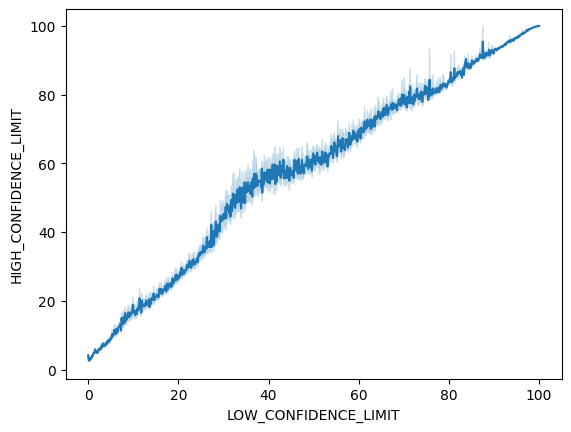

In [296]:
# Create a line plot with 'LOW_CONFIDENCE_LIMIT' on the x-axis and 'HIGH_CONFIDENCE_LIMIT' on the y-axis
sns.lineplot(x=final_data['LOW_CONFIDENCE_LIMIT'], y=final_data['HIGH_CONFIDENCE_LIMIT'])


**Bar Plot**

A bar plot is a common data visualization that represents categorical data with rectangular bars. Each bar's length corresponds to the frequency or count of the categorical variable, making it a straightforward and effective way to compare different categories. Bar plots are especially useful for displaying the distribution of categorical data or comparing the occurrence of different categories across a dataset.

ns.barplot(y=final_data['DATA_VALUE'], x=final_data['DISPLAYORDER']) utilizes Seaborn to create a bar plot based on the 'DATA_VALUE' and 'DISPLAYORDER' columns in the 'final_data' DataFrame. This specific bar plot visualizes the relationship between the data values and their corresponding display order, offering insights into potential patterns or trends in the dataset.

<Axes: xlabel='DISPLAYORDER', ylabel='DATA_VALUE'>

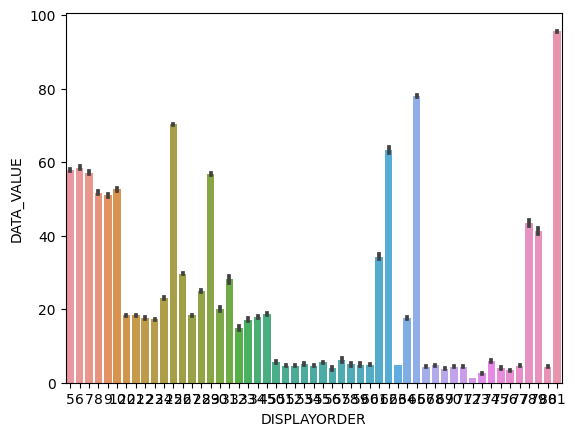

In [297]:
# Create a bar plot with 'DATA_VALUE' on the y-axis and 'DISPLAYORDER' on the x-axis
sns.barplot(y=final_data['DATA_VALUE'], x=final_data['DISPLAYORDER'])


**Count Plot**

A countplot is a type of categorical plot that displays the distribution of a categorical variable by depicting the count of observations in each category. It provides a quick and intuitive way to visualize the frequency or distribution of different categories within a dataset. Countplots are particularly useful for exploring the composition and prevalence of categorical variables.

sns.countplot(x=final_data['TOPICDESC']) utilizes Seaborn to create a count plot based on the 'TOPICDESC' column in the 'final_data' DataFrame. This count plot provides a visual summary of the frequency of each unique topic description, offering insights into the distribution and prevalence of different topics within the dataset.

<Axes: xlabel='TOPICDESC', ylabel='count'>

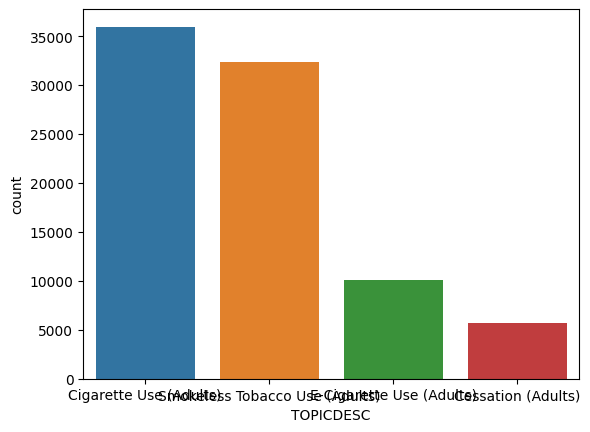

In [298]:
# Create a count plot to visualize the frequency of each category in the 'TOPICDESC' column
sns.countplot(x=final_data['TOPICDESC'])


# Conclusion

The dataset offers an in-depth look at the patterns and trends of tobacco use, making it invaluable for health-related research and policy-making.
Its detailed breakdown by various demographics allows for a better understanding of how tobacco use affects different groups within the population.
The consistent data collection over years provides a longitudinal perspective, crucial for observing changes and trends in tobacco use.
This dataset can be instrumental in crafting targeted public health interventions and educational campaigns to reduce tobacco use.
Ultimately, it serves as a key resource for driving efforts towards a healthier society with reduced tobacco-related health risks.